## Sentiment prediction of New Review Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/TCS PROJECT/fresh_review_for_prediction.tsv', delimiter = '\t', quoting = 3)

## Cleaning the dataset

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 100):
  zomato_ratings = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  zomato_ratings = zomato_ratings.lower()
  zomato_ratings = zomato_ratings.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  zomato_ratings = [ps.stem(word) for word in zomato_ratings if not word in set(all_stopwords)]
  zomato_ratings = ' '.join(zomato_ratings)
  corpus.append(zomato_ratings)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(corpus)

['spend money elsewher', 'regular toast bread equal satisfi occasion pat butter mmmm', 'buffet bellagio far anticip', 'drink weak peopl', 'order not correct', 'also feel like chip bought not made hous', 'disappoint dinner went elsewher dessert', 'chip sal amaz', 'return', 'new fav vega buffet spot', 'serious cannot believ owner mani unexperienc employe run around like chicken head cut', 'sad', 'felt insult disrespect could talk judg anoth human like', 'call steakhous properli cook steak understand', 'not impress concept food', 'thing crazi guacamol like pur ed', 'realli noth postino hope experi better', 'got food poison buffet', 'brought fresh batch fri think yay someth warm', 'hilari yummi christma eve dinner rememb biggest fail entir trip us', 'needless say go back anytim soon', 'place disgust', 'everi time eat see care teamwork profession degre', 'ri style calamari joke', 'howev much garlic fondu bare edibl', 'could bare stomach meal complain busi lunch', 'bad lost heart finish', 'a

## Data Transformation

In [ ]:
# Loading BoW dictionary
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cvFile='/content/drive/MyDrive/TCS PROJECT/bow_sentiment_analysis.pkl'
cv = pickle.load(open(cvFile, "rb"))


In [ ]:
X_fresh = cv.transform(corpus).toarray()
X_fresh.shape

(100, 1500)

## Prediction via sentiment classifier

In [ ]:
import joblib
classifier = joblib.load('/content/drive/MyDrive/TCS PROJECT/Classifier_Sentiment_Model')

In [ ]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
dataset['predicted_label'] = y_pred.tolist()
dataset.head()

,Review,predicted_label
0,Spend your money elsewhere.,0
1,Their regular toasted bread was equally satisf...,1
2,The Buffet at Bellagio was far from what I ant...,0
3,"And the drinks are WEAK, people!",0
4,-My order was not correct.,0


In [ ]:
dataset.to_csv("/content/drive/MyDrive/TCS PROJECT/Predicted_Sentiments_for_Fresh_Review.tsv", sep='\t', encoding='UTF-8', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TCS PROJECT/Predicted_Sentiments_for_Fresh_Review.tsv',sep='\t')

In [ ]:
df['predicted_label'].value_counts()

0    88
1    12
Name: predicted_label, dtype: int64

In [ ]:
new_df = df['predicted_label'].value_counts().rename_axis('Review').reset_index(name ='counts')
new_df

,Review,counts
0,0,88
1,1,12


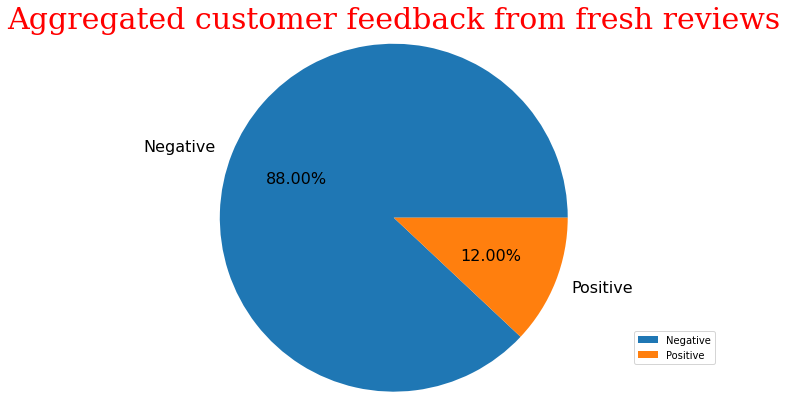

In [ ]:
review_counts = [88,12]
labels = ['Negative','Positive']
font1 = {'family':'serif','color':'red','size':30}
plt.title('Aggregated customer feedback from fresh reviews',fontdict = font1,pad = '80.0')
plt.pie(review_counts,labels=labels,radius = 2,autopct ='%.2f%%',textprops={'fontsize' : 16})
plt.legend(bbox_to_anchor=(2,0),loc = 'upper right')